In [5]:
import numpy as np
import pandas as pd
import os
print(os.listdir("./input"))
import matplotlib.pyplot as plt
import cv2
import sklearn
import seaborn as sb

from skimage.color import rgb2gray
from skimage.filters import laplace, sobel, roberts

['blur_dataset_scaled', 'Testing']


In [2]:
print('Sobel operator:\n',np.matrix([[1,0,-1],[2,0,-2],[1,0,-1]]))
print('Laplacian operator:\n',np.matrix([[0,-1,0],[-1,4,-1],[0,-1,0]]))

Sobel operator:
 [[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]
Laplacian operator:
 [[ 0 -1  0]
 [-1  4 -1]
 [ 0 -1  0]]


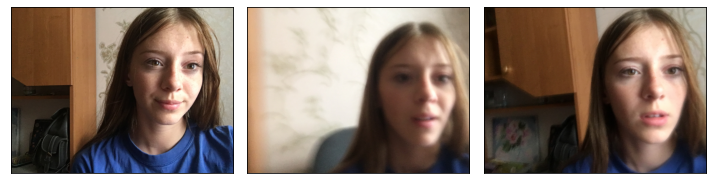

In [7]:
s_path ='./input/blur_dataset_scaled/sharp/'
df_path='./input/blur_dataset_scaled/defocused_blurred/'
mot_path ='./input/blur_dataset_scaled/motion_blurred/'

img_paths = ['./input/blur_dataset_scaled/sharp/89_IPHONE-6S_S.jpeg','./input/blur_dataset_scaled/defocused_blurred/89_IPHONE-6S_F.jpeg','./input/blur_dataset_scaled/motion_blurred/89_IPHONE-6S_M.jpeg']
 
def show_images(path):
    plt.figure(figsize=(10,10))
    for i in range(len(path)):
        x=plt.imread(path[i])
        plt.subplot(1, 3, i+1)
        plt.imshow(x)
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout()
    plt.show()
show_images(img_paths)

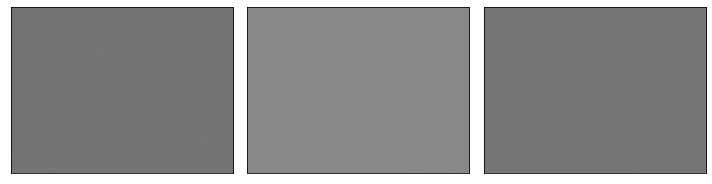

In [84]:
def show_images(path):
    plt.figure(figsize=(10,10))
    for i in range(len(path)):
        x=cv2.imread(path[i],0)
        l = laplace(x)
        plt.subplot(1, 3, i+1)
        plt.imshow(l,cmap='gray')
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout()
    plt.show()
show_images(img_paths)

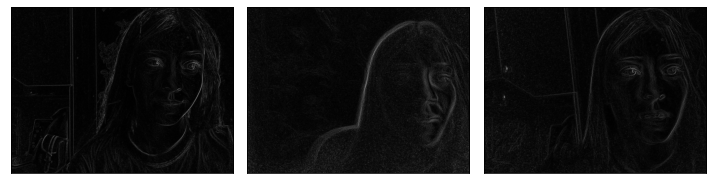

In [5]:
def show_images(path):
    plt.figure(figsize=(10,10))
    for i in range(len(path)):
        x=cv2.imread(path[i],0)
        l = sobel(x)
        plt.subplot(1, 3, i+1)
        plt.imshow(l,cmap='gray')
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout()
    plt.show()
show_images(img_paths)

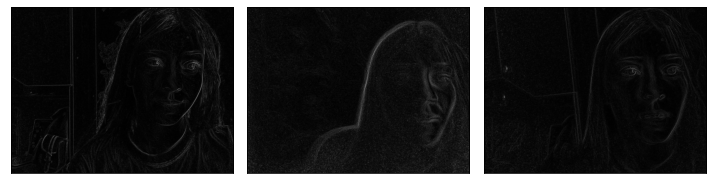

In [6]:
def show_images(path):
    plt.figure(figsize=(10,10))
    for i in range(len(path)):
        x=cv2.imread(path[i],0)
        l = roberts(x)
        plt.subplot(1, 3, i+1)
        plt.imshow(l,cmap='gray')
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout()
    plt.show()
show_images(img_paths)

In [8]:
sharp_images = os.listdir(s_path)
defocused = os.listdir(df_path)
motion_blurred = os.listdir(mot_path)

In [9]:
def get_data(path,images):
    features=[]
    for img in images:
        feature=[]
        image_gray = cv2.imread(path+img,0)
        lap_feat = laplace(image_gray)
        sob_feat = sobel(image_gray)
        rob_feat = roberts(image_gray)
        feature.extend([img,lap_feat.mean(),lap_feat.var(),np.amax(lap_feat),
                        sob_feat.mean(),sob_feat.var(),np.max(sob_feat),
                        rob_feat.mean(),rob_feat.var(),np.max(rob_feat)])
        
        features.append(feature)
    return features

In [10]:
sharp_features = get_data(s_path,sharp_images)
defocused_features = get_data(df_path,defocused)
motion_blur_features = get_data(mot_path,motion_blurred)

In [11]:
sharp_df = pd.DataFrame(sharp_features)
sharp_df.drop(0,axis=1,inplace=True)
sharp_df.head()

,1,2,3,4,5,6,7,8,9
0,7.566828e-20,0.003802,1.415686,0.015326,0.001595,0.646710,0.014822,0.001376,0.737198
1,-4.964296e-20,0.001529,2.027451,0.008476,0.000504,0.660981,0.009369,0.000393,0.835331
2,-2.432902e-19,0.001927,1.690196,0.009796,0.000243,0.635161,0.012743,0.000204,0.770586
3,-1.096116e-19,0.001207,1.690196,0.009472,0.000554,0.642719,0.009628,0.000415,0.890196
4,-2.365622e-18,0.020139,1.964706,0.032508,0.004059,0.515597,0.033221,0.004987,0.649023


In [12]:
defocused_df = pd.DataFrame(defocused_features)
defocused_df.drop(0,axis=1,inplace=True)
defocused_df.head()

,1,2,3,4,5,6,7,8,9
0,2.795209e-19,0.000300,0.176471,0.006874,0.000038,0.119933,0.007256,0.000033,0.095416
1,-2.876114e-19,0.001523,0.439216,0.008265,0.000113,0.268679,0.011235,0.000104,0.213806
2,-1.772849e-19,0.001448,0.349020,0.007755,0.000046,0.247669,0.011123,0.000065,0.207991
3,-9.422233e-20,0.000446,0.388235,0.006110,0.000098,0.305433,0.007143,0.000068,0.243927
4,-2.660389e-19,0.000206,0.207843,0.005652,0.000026,0.098479,0.005680,0.000025,0.094199


In [13]:
motion_df = pd.DataFrame(motion_blur_features)
motion_df.drop(0,axis=1,inplace=True)
motion_df.head()

,1,2,3,4,5,6,7,8,9
0,-5.934878e-19,0.000742,0.721569,0.009790,0.000275,0.537317,0.009816,0.000211,0.586278
1,-4.301860e-19,0.005499,1.909804,0.013139,0.001227,0.631654,0.016042,0.001262,0.779973
2,-1.910261e-19,0.001661,1.031373,0.008296,0.000115,0.563572,0.011793,0.000109,0.617295
3,-1.336388e-19,0.000828,1.149020,0.006880,0.000220,0.637778,0.008207,0.000162,0.678312
4,3.777767e-19,0.000991,0.564706,0.010362,0.000457,0.445415,0.009415,0.000416,0.520151


In [14]:
label = ['Sharp_images','Defocused_images','Mtion_blurred_images']
no_images=[len(sharp_features),len(defocused_features),len(motion_blur_features)]
no_images

[350, 350, 350]

In [35]:
# classification between sharp and defocused
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score, classification_report
images=pd.DataFrame()

images = images.append(sharp_df)
images = images.append(defocused_df)
all_features = np.array(images)
y_f = np.concatenate((np.ones((sharp_df.shape[0], )), np.zeros((defocused_df.shape[0], ))), axis=0)

x_train,x_valid,y_train,y_valid = train_test_split(all_features,y_f,test_size=0.33,stratify=y_f)

svm_model1 = svm.SVC(C=100,kernel='linear')
svm_model1.fit(x_train,y_train)
pred =svm_model1.predict(x_valid)
print('Accuracy:',accuracy_score(y_valid,pred))
print('Confusion matrix:\n',confusion_matrix(y_valid,pred))
print('F1_score:',f1_score(y_valid,pred))
print('Classification_report:\n',classification_report(y_valid,pred))

Accuracy: 0.9653679653679653
Confusion matrix:
 [[111   5]
 [  3 112]]
F1_score: 0.9655172413793104
Classification_report:
               precision    recall  f1-score   support

         0.0       0.97      0.96      0.97       116
         1.0       0.96      0.97      0.97       115

    accuracy                           0.97       231
   macro avg       0.97      0.97      0.97       231
weighted avg       0.97      0.97      0.97       231



In [36]:
# kernel changed
svm_model2 = svm.SVC(C=100,kernel='rbf')
svm_model2.fit(x_train,y_train)
pred =svm_model2.predict(x_valid)
print('Accuracy:',accuracy_score(y_valid,pred))
print('Confusion matrix:\n',confusion_matrix(y_valid,pred))
print('F1_score:',f1_score(y_valid,pred))
print('Classification_report:\n',classification_report(y_valid,pred))

Accuracy: 0.974025974025974
Confusion matrix:
 [[113   3]
 [  3 112]]
F1_score: 0.9739130434782609
Classification_report:
               precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       116
         1.0       0.97      0.97      0.97       115

    accuracy                           0.97       231
   macro avg       0.97      0.97      0.97       231
weighted avg       0.97      0.97      0.97       231



In [26]:
# classification between sharp and 'defocused & motion-blur'
images=pd.DataFrame()

images = images.append(sharp_df)
images = images.append(defocused_df)
images = images.append(motion_df)
all_features = np.array(images)
y_f = np.concatenate((np.ones((sharp_df.shape[0], )), np.zeros((defocused_df.shape[0]+motion_df.shape[0], ))), axis=0)

x_train,x_valid,y_train,y_valid = train_test_split(all_features,y_f,test_size=0.33,stratify=y_f)

svm_model3 = svm.SVC(C=1000,kernel='rbf')
svm_model3.fit(x_train,y_train)
pred =svm_model3.predict(x_valid)
print('Accuracy:',accuracy_score(y_valid,pred))
print('Confusion matrix:\n',confusion_matrix(y_valid,pred))
print('F1_score:',f1_score(y_valid,pred))
print('Classification_report:\n',classification_report(y_valid,pred))

Accuracy: 0.8587896253602305
Confusion matrix:
 [[201  30]
 [ 19  97]]
F1_score: 0.7983539094650205
Classification_report:
               precision    recall  f1-score   support

         0.0       0.91      0.87      0.89       231
         1.0       0.76      0.84      0.80       116

    accuracy                           0.86       347
   macro avg       0.84      0.85      0.84       347
weighted avg       0.86      0.86      0.86       347



In [25]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import svm

param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

images=pd.DataFrame()

images = images.append(sharp_df)
images = images.append(defocused_df)
images = images.append(motion_df)
all_features = np.array(images)
y_f = np.concatenate((np.zeros((sharp_df.shape[0], )), np.ones((defocused_df.shape[0], )), 2*np.ones((motion_df.shape[0], ))), axis=0)

x_train,x_valid,y_train,y_valid = train_test_split(all_features,y_f,test_size=0.33,stratify=y_f)

svm_model = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

svm_model.fit(x_train,y_train)
pred =svm_model.predict(x_valid)
print('Accuracy:',accuracy_score(y_valid,pred))
print('Confusion matrix:\n',confusion_matrix(y_valid,pred))
y_valid_cat = to_categorical(y_valid, num_classes=3)
pred_cat = to_categorical(pred, num_classes=3)
print('F1_score:',f1_score(y_valid_cat,pred_cat, average='weighted'))
print('Classification_report:\n',classification_report(y_valid_cat,pred_cat))
print(svm_model.best_estimator_)
print(svm_model.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.681 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.752 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.695 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.671 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.603 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.681 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.567 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.600 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.333 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.759 total time=   0.0s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.745 total time=   0.0s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.757 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.736 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.738 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.773 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.695 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.721 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.721 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.730 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.759 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.702 total time=   0.0s
[CV 4/5] END ....C=1000, gam

In [42]:
def get_one_data(path,img):
    feature=[]
    image_gray = cv2.imread(path+img,0)
    lap_feat = laplace(image_gray)
    sob_feat = sobel(image_gray)
    rob_feat = roberts(image_gray)
    feature.extend([img,lap_feat.mean(),lap_feat.var(),np.amax(lap_feat),
                    sob_feat.mean(),sob_feat.var(),np.max(sob_feat),
                    rob_feat.mean(),rob_feat.var(),np.max(rob_feat)])
    return feature

In [63]:
test_image1 = get_one_data("./input/Testing/","WhatsApp_Image_focus.jpeg")
test_image1 = np.array([test_image1[1:]])
pred =svm_model3.predict(test_image1)
print(pred)

[0.]


In [65]:
test_image1 = get_one_data("./input/Testing/","WhatsApp_Image_sharp.jpeg")
test_image1 = np.array([test_image1[1:]])
pred =svm_model3.predict(test_image1)
print(pred)

[1.]


In [67]:
test_image1 = get_one_data("./input/Testing/","WhatsApp_Image_motion.jpeg")
test_image1 = np.array([test_image1[1:]])
pred =svm_model3.predict(test_image1)
print(pred)

[0.]


In [78]:
test_image1 = get_one_data("./input/Testing/","WhatsApp_Image_focus.jpeg")
test_image1 = np.array([test_image1[1:]])
pred =svm_model.predict(test_image1)
pred_cat = to_categorical(pred, num_classes=3)
print(pred_cat)
# [sharp,focus,motion]

[1.]
[[0. 1. 0.]]


In [89]:
import pickle
pickle.dump(svm_model2, open('blurNotBlur.pkl', 'wb'))

In [1]:
# def get_one_data(path,img):
#     feature=[]
#     image_gray = cv2.imread(path+img,0)
#     lap_feat = laplace(image_gray)
#     sob_feat = sobel(image_gray)
#     rob_feat = roberts(image_gray)
#     feature.extend([img,lap_feat.mean(),lap_feat.var(),np.amax(lap_feat),
#                     sob_feat.mean(),sob_feat.var(),np.max(sob_feat),
#                     rob_feat.mean(),rob_feat.var(),np.max(rob_feat)])
#     return feature

# pickled_model = pickle.load(open('blurNotBlur.pkl', 'rb'))

# test_image1 = get_one_data("./input/Testing/","WhatsApp_Image_sharp.jpeg")
# test_image1 = np.array([test_image1[1:]])
# pred = pickled_model.predict(test_image1)
# print(pred)

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score, classification_report
from tensorflow.keras.utils import to_categorical

images=pd.DataFrame()

images = images.append(sharp_df)
images = images.append(defocused_df)
images = images.append(motion_df)
all_features = np.array(images)
y_f = np.concatenate((np.zeros((sharp_df.shape[0], )), np.ones((defocused_df.shape[0], )), 2*np.ones((motion_df.shape[0], ))), axis=0)

x_train,x_valid,y_train,y_valid = train_test_split(all_features,y_f,test_size=0.33,stratify=y_f)

rf_model = RandomForestClassifier(n_estimators=1000)
rf_model.fit(x_train,y_train)
pred =rf_model.predict(x_valid)
print('Accuracy:',accuracy_score(y_valid,pred))
print('Confusion matrix:\n',confusion_matrix(y_valid,pred))
y_valid_cat = to_categorical(y_valid, num_classes=3)
pred_cat = to_categorical(pred, num_classes=3)
print('F1_score:',f1_score(y_valid_cat,pred_cat, average='weighted'))
print('Classification_report:\n',classification_report(y_valid_cat,pred_cat))

Accuracy: 0.7435158501440923
Confusion matrix:
 [[98  0 18]
 [ 0 95 20]
 [15 36 65]]
F1_score: 0.7405286123767332
Classification_report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.86       116
           1       0.73      0.83      0.77       115
           2       0.63      0.56      0.59       116

   micro avg       0.74      0.74      0.74       347
   macro avg       0.74      0.74      0.74       347
weighted avg       0.74      0.74      0.74       347
 samples avg       0.74      0.74      0.74       347

